# Lesson_6_ex

### METADATA
Предположим, что Толя любит авокадо и решил посмотреть динамику цен на данный продукт в США. 

Имеется следующий набор данных от Hass Avocado Board 🥑:

    Date — дата
    AveragePrice — средняя цена одного авокадо
    Total Volume — количество проданных авокадо
    4046 — количество проданных авокадо PLU* 4046
    4225 — количество проданных авокадо PLU 4225
    4770 — количество проданных авокадо PLU 4770
    Total Bags — всего упаковок
    Small Bags — маленькие упаковки
    Large Bags — большие
    XLarge Bags — очень большие
    type — обычный или органический
    year — год
    Region — город или регион the city or region of the observation
    *PLU — код товара (Product Lookup code)

*В датафрейме находятся данные не за каждый день, а за конец каждой недели. 

Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи. 

Предположим, что нас это разделение не интересует, поэтому в avocado_mean записаны агрегированные данные, 
где:

avocado_mean = pd.read_csv("path",
                           index_col=0, squeeze=True, parse_dates=['Date'])

Date

       2015-01-04    1.301296
       2015-01-11    1.370648
       2015-01-18    1.391111
       2015-01-25    1.397130
       2015-02-01    1.247037

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

import plotly.express as px
# plotly.express - для построения интерактивных графиков

In [3]:
# настройка отображения графиков в seaborn по умолчанию:
sns.set(
        font_scale = 2,                            # размер шрифта
        style      = "whitegrid",                  # общий вид графика: "whitegrid" - белый фон и линиями 
        rc         = {'figure.figsize':(20,7)}     # размерность отображения графика
        )

### Task_1:

In [4]:
path1 = 'C://Users/user/Karpov_courses/Lessons/Lesson_6/avocado_full.csv'
path2 = 'C://Users/user/Karpov_courses/Lessons/Lesson_6/avocado_mean.csv'
path3 = 'C://Users/user/Karpov_courses/Lessons/Lesson_6/delays.csv'

In [5]:
avocado_full = pd.read_csv(path1, index_col=0)   # index_col=0 - использовать первую колонку в качестве индекса
avocado_full.head()

AveragePrice  Total Volume     4046      4225     4770  \
Date                                                                 
2015-01-04          1.75      27365.89  9307.34   3844.81   615.28   
2015-01-04          1.49      17723.17  1189.35  15628.27     0.00   
2015-01-04          1.68       2896.72   161.68    206.96     0.00   
2015-01-04          1.52      54956.80  3013.04  35456.88  1561.70   
2015-01-04          1.64       1505.12     1.27   1129.50     0.00   

            Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
Date                                                                        
2015-01-04    13598.46    13061.10      537.36          0.0       organic   
2015-01-04      905.55      905.55        0.00          0.0       organic   
2015-01-04     2528.08     2528.08        0.00          0.0       organic   
2015-01-04    14925.18    11264.80     3660.38          0.0  conventional   
2015-01-04      374.35      186.67      187.68          0.0       organic   

            year              region  
Date                                  
2015-01-04  2015           Southeast  
2015-01-04  2015             Chicago  
2015-01-04  2015  HarrisburgScranton  
2015-01-04  2015          Pittsburgh  
2015-01-04  2015               Boise

In [7]:
avocado_full.shape

(18249, 12)

In [11]:
avocado_full['Date'] = pd.to_datetime(avocado_full.Date)
avocado_full.dtypes

AttributeError: 'DataFrame' object has no attribute 'Date'

In [9]:
avocado_mean = pd.read_csv(path2, index_col=0, parse_dates=['Date'])
avocado_mean.reset_index(inplace= True)
avocado_mean.head()

Date  AveragePrice
0 2015-01-04      1.301296
1 2015-01-11      1.370648
2 2015-01-18      1.391111
3 2015-01-25      1.397130
4 2015-02-01      1.247037

In [12]:
avocado_mean.shape

(169, 2)

### Task_2:
2) Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.

In [13]:
avocado_full.head()

AveragePrice  Total Volume     4046      4225     4770  \
Date                                                                 
2015-01-04          1.75      27365.89  9307.34   3844.81   615.28   
2015-01-04          1.49      17723.17  1189.35  15628.27     0.00   
2015-01-04          1.68       2896.72   161.68    206.96     0.00   
2015-01-04          1.52      54956.80  3013.04  35456.88  1561.70   
2015-01-04          1.64       1505.12     1.27   1129.50     0.00   

            Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
Date                                                                        
2015-01-04    13598.46    13061.10      537.36          0.0       organic   
2015-01-04      905.55      905.55        0.00          0.0       organic   
2015-01-04     2528.08     2528.08        0.00          0.0       organic   
2015-01-04    14925.18    11264.80     3660.38          0.0  conventional   
2015-01-04      374.35      186.67      187.68          0.0       organic   

            year              region  
Date                                  
2015-01-04  2015           Southeast  
2015-01-04  2015             Chicago  
2015-01-04  2015  HarrisburgScranton  
2015-01-04  2015          Pittsburgh  
2015-01-04  2015               Boise

In [14]:
max_AveragePrice_rolling_w3 = avocado_full\
                                        .AveragePrice\
                                        .rolling(3).mean()\
                                        .max()

print(
f'''Максимальное значение скользящего среднего цены авокадо (AveragePrice) с окном:= "3":
{round(max_AveragePrice_rolling_w3, 2)}'''
)

Максимальное значение скользящего среднего цены авокадо (AveragePrice) с окном:= "3":
2.67


In [15]:
max_avocado_mean_rolling_w3 = avocado_mean\
                                        .AveragePrice\
                                        .rolling(3).mean()\
                                        .max()

print(
f'''Максимальное значение скользящего среднего цены авокадо (AveragePrice) с окном:= "3":
{round(max_avocado_mean_rolling_w3, 2)}'''
)

Максимальное значение скользящего среднего цены авокадо (AveragePrice) с окном:= "3":
1.85


### Task_3:
Отлично! Помимо авокадо, Толя любит смотреть на графики. Самое время посмотреть, как изменится график в зависимости от выбранного размера окна.

3) 
Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50), посмотреть на изменения и соотнести приведенные ниже картинки с соответствующим значением размера окна. (task3.png)

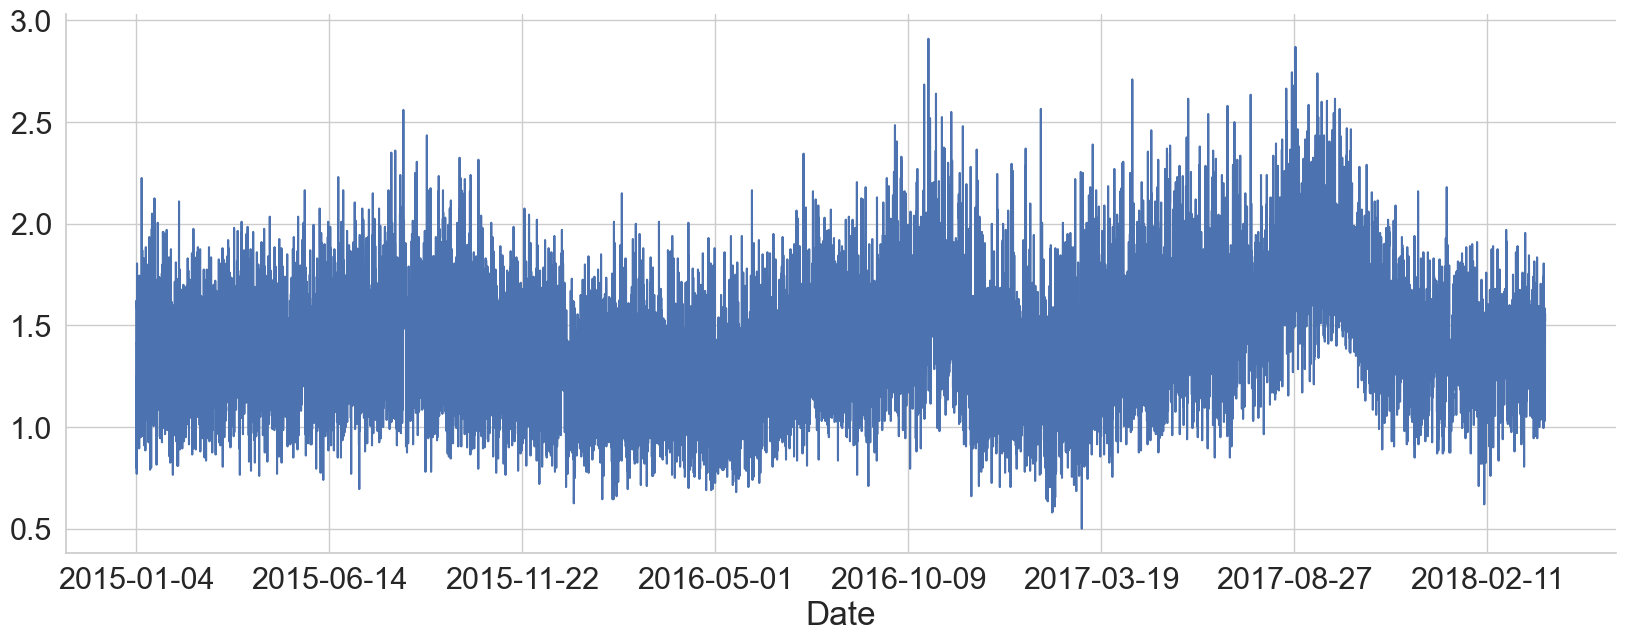

In [16]:
AveragePrice_rolling_w2 = avocado_full\
                                    .AveragePrice\
                                    .rolling(2).mean()
AveragePrice_rolling_w2.plot()
sns.despine()  

<Axes: >

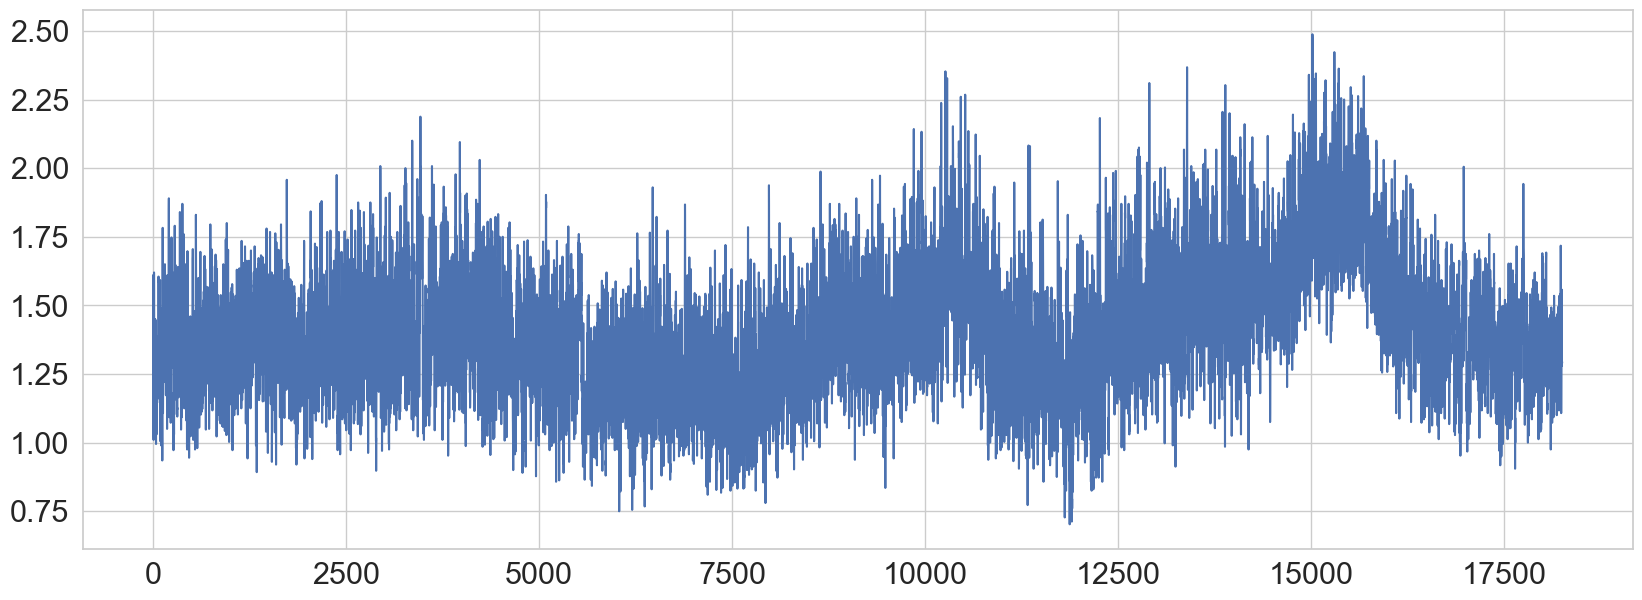

In [79]:
AveragePrice_rolling_w4 = avocado_full\
                                    .AveragePrice\
                                    .rolling(4).mean()
AveragePrice_rolling_w4.plot()

<Axes: >

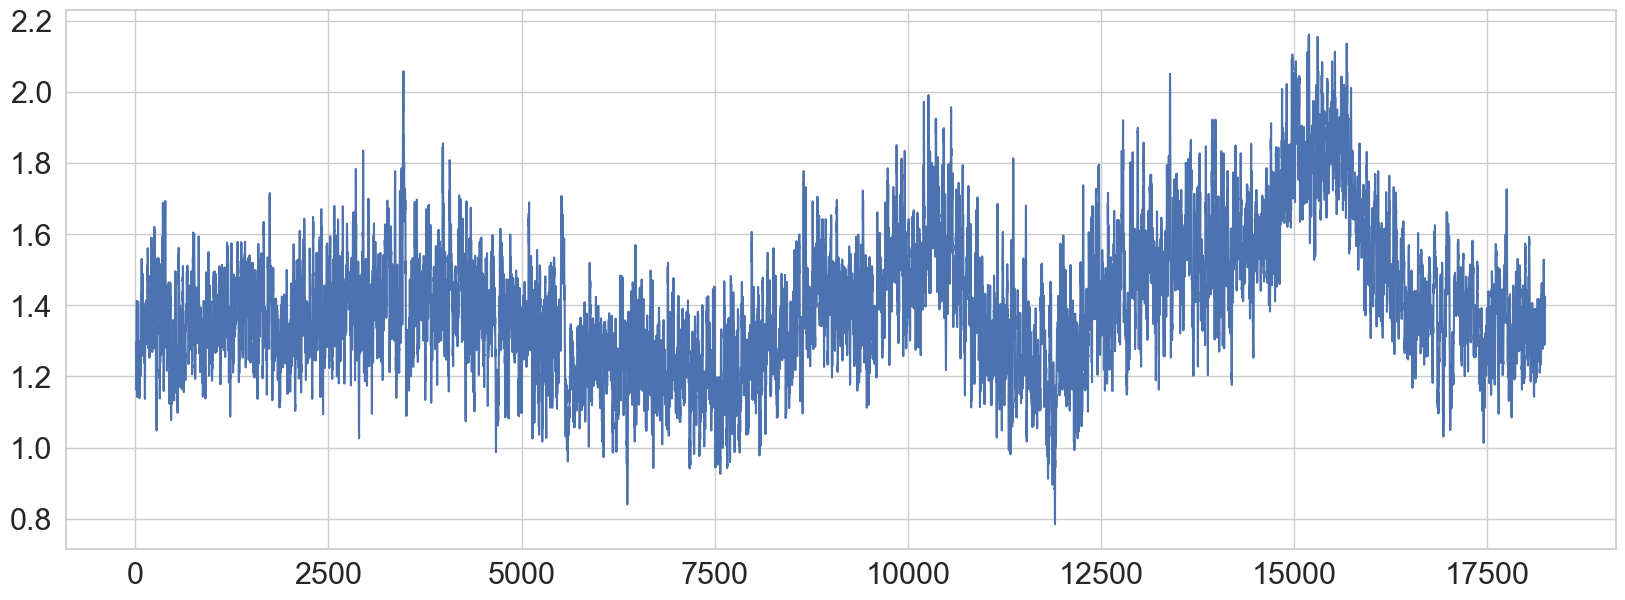

In [80]:
AveragePrice_rolling_w10 = avocado_full\
                                    .AveragePrice\
                                    .rolling(10).mean()
AveragePrice_rolling_w10.plot()

<Axes: xlabel='Date'>

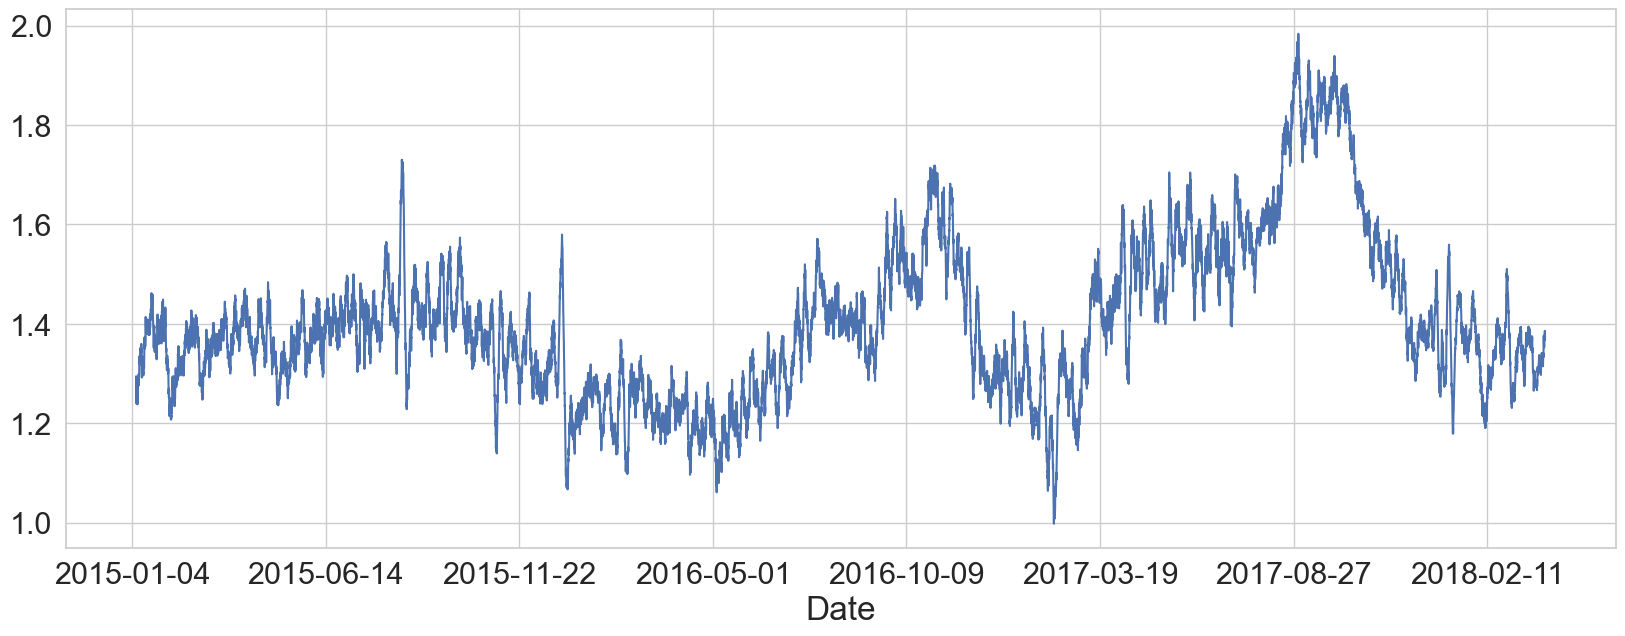

In [17]:
AveragePrice_rolling_w50 = avocado_full\
                                    .AveragePrice\
                                    .rolling(50).mean()
AveragePrice_rolling_w50.plot()

In [88]:
# Скользящее среднее по DF: avocado_mean
# window: 4, 10, 50

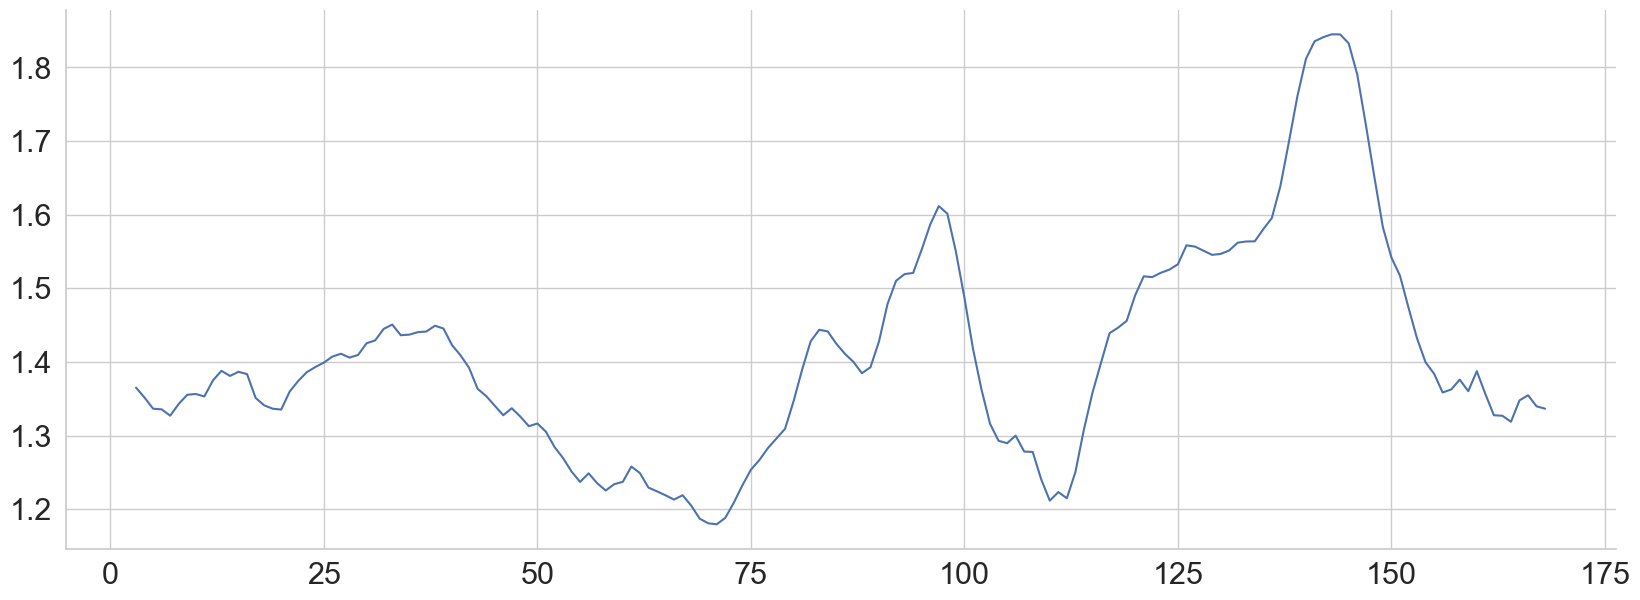

In [18]:
avocado_mean_rolling_w4 = avocado_mean\
                                    .AveragePrice\
                                    .rolling(4).mean()
avocado_mean_rolling_w4.plot()
sns.despine()

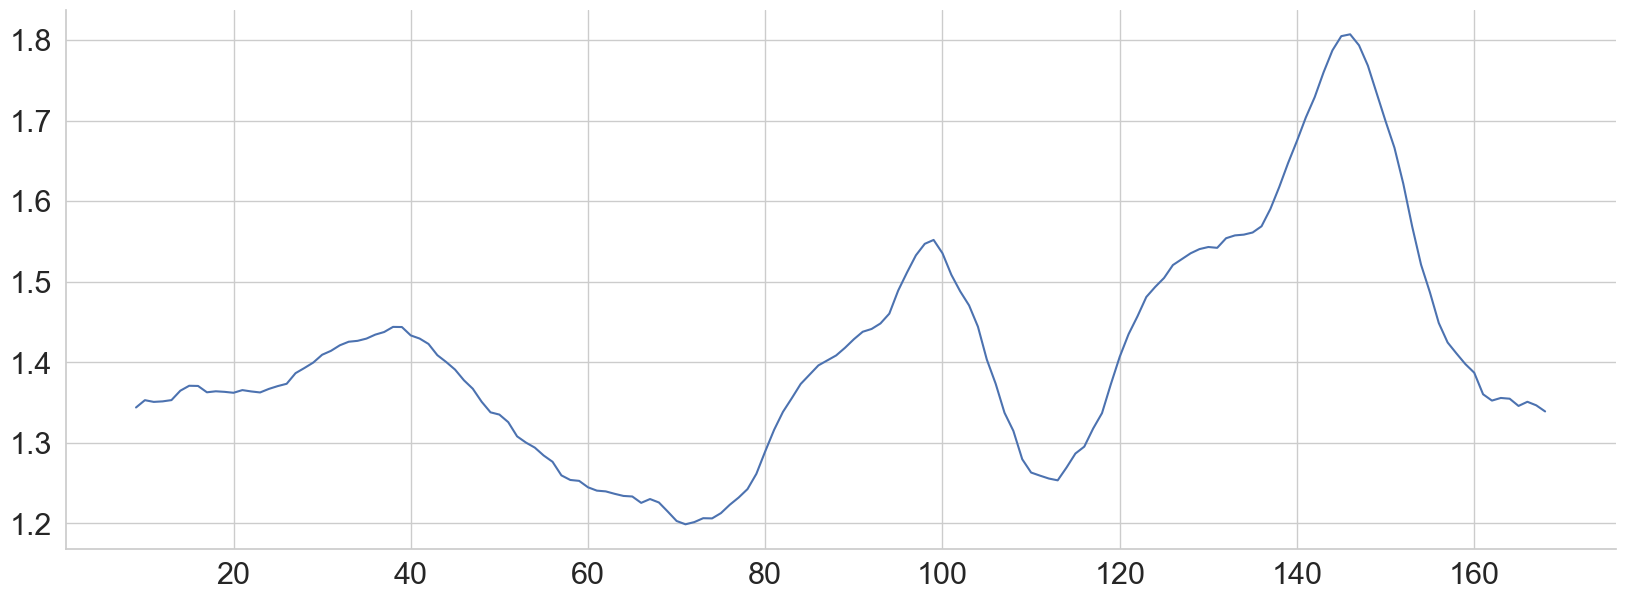

In [19]:
avocado_mean_rolling_w10 = avocado_mean\
                                    .AveragePrice\
                                    .rolling(10).mean()
avocado_mean_rolling_w10.plot()
sns.despine()

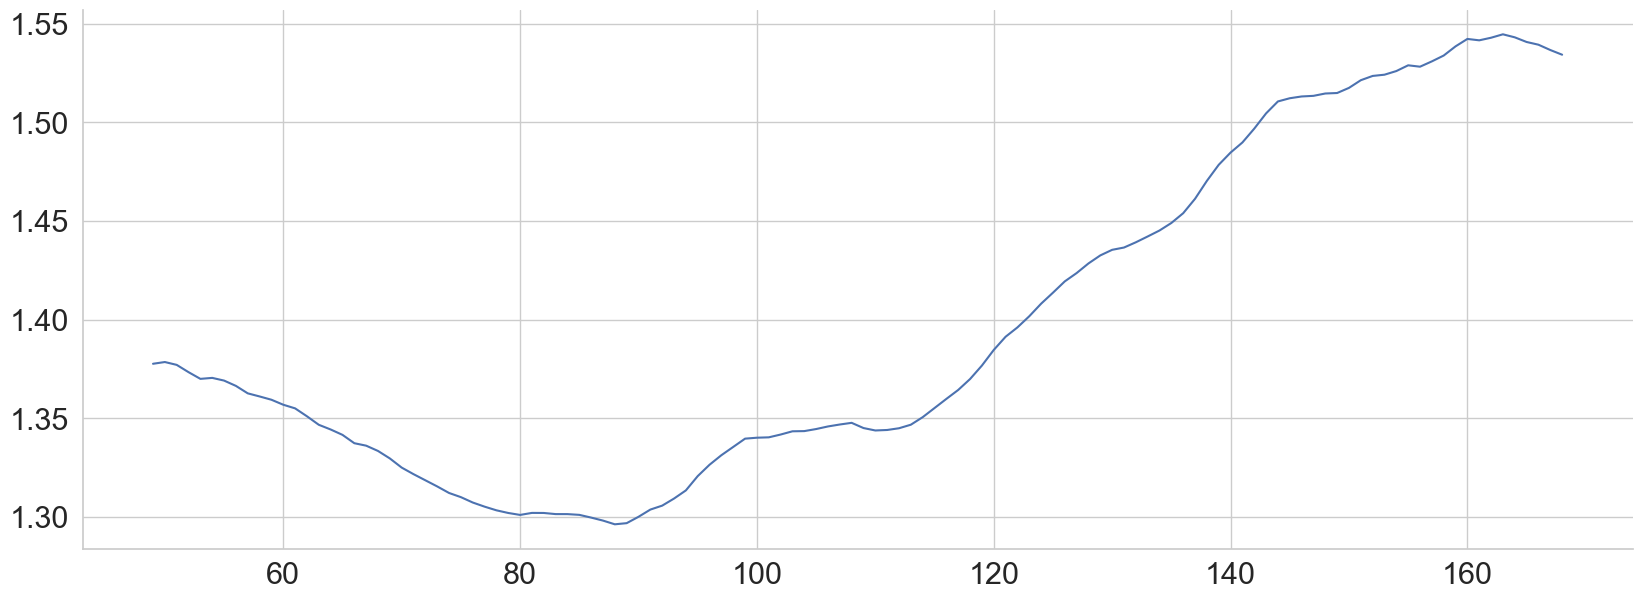

In [20]:
avocado_mean_rolling_w50 = avocado_mean\
                                    .AveragePrice\
                                    .rolling(50).mean()
avocado_mean_rolling_w50.plot()
sns.despine()

In [109]:
avocado_mean

Date  AveragePrice
0   2015-01-04      1.301296
1   2015-01-11      1.370648
2   2015-01-18      1.391111
3   2015-01-25      1.397130
4   2015-02-01      1.247037
..         ...           ...
164 2018-02-25      1.359630
165 2018-03-04      1.350185
166 2018-03-11      1.335093
167 2018-03-18      1.313704
168 2018-03-25      1.346852

[169 rows x 2 columns]

In [21]:
avocado_mean.Date.min()

Timestamp('2015-01-04 00:00:00')

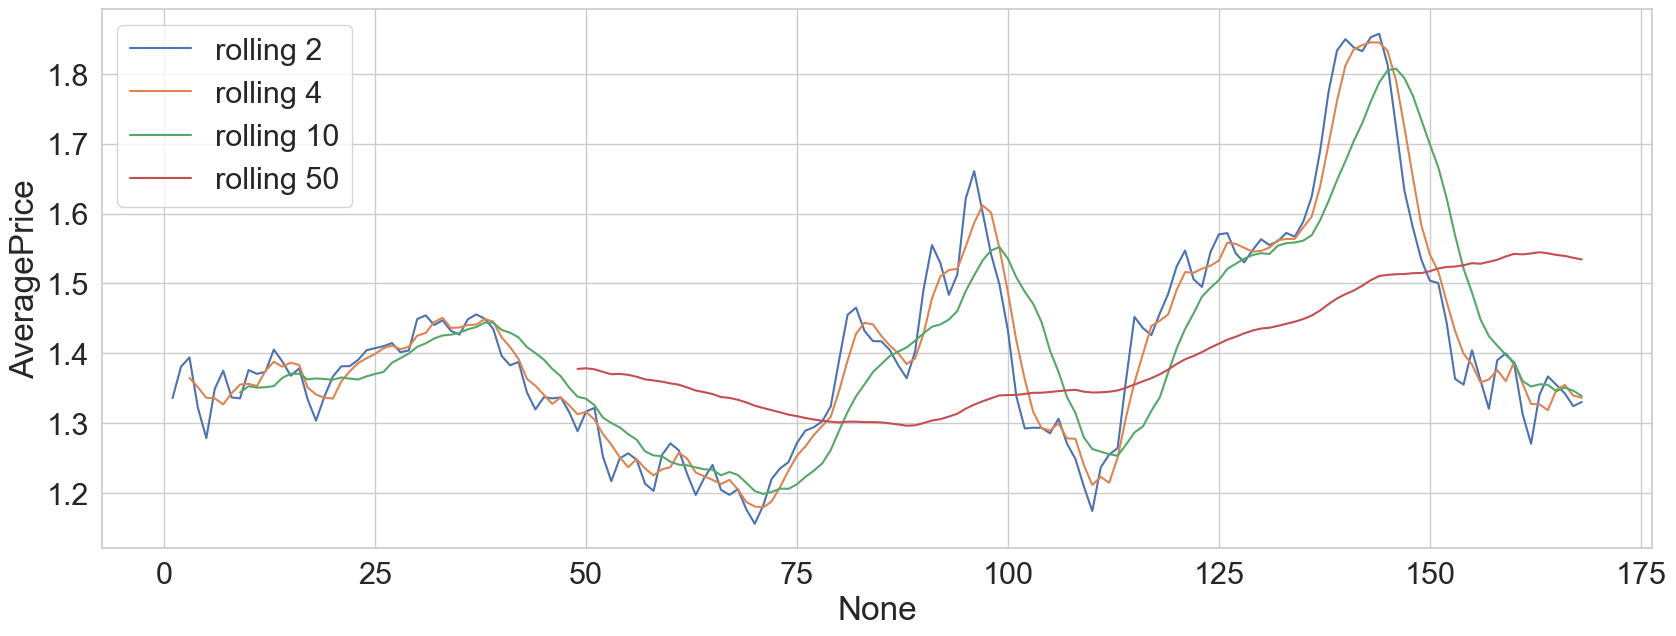

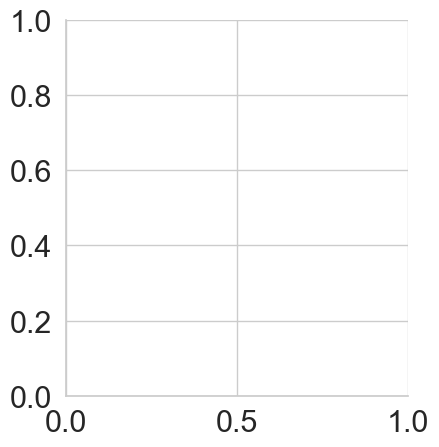

In [131]:
avocado_mean_2 = avocado_mean.AveragePrice.rolling(2).mean().to_frame()
avocado_mean_4 = avocado_mean.AveragePrice.rolling(4).mean().to_frame()
avocado_mean_10 = avocado_mean.AveragePrice.rolling(10).mean().to_frame()
avocado_mean_50 = avocado_mean.AveragePrice.rolling(50).mean().to_frame()

# plt.figure(figsize=(12,8))

# sns.lineplot(avocado_mean, x = avocado_mean.Date, y = avocado_mean.AveragePrice, label = 'original')

sns.lineplot(avocado_mean_2, x = avocado_mean_2.index, y = avocado_mean_2.AveragePrice, label = 'rolling 2')
sns.lineplot(avocado_mean_4, x = avocado_mean_4.index, y = avocado_mean_4.AveragePrice, label = 'rolling 4')
sns.lineplot(avocado_mean_10, x = avocado_mean_10.index, y = avocado_mean_10.AveragePrice, label = 'rolling 10')
sns.lineplot(avocado_mean_50, x = avocado_mean_50.index, y = avocado_mean_50.AveragePrice, label = 'rolling 50')

sns.displot()

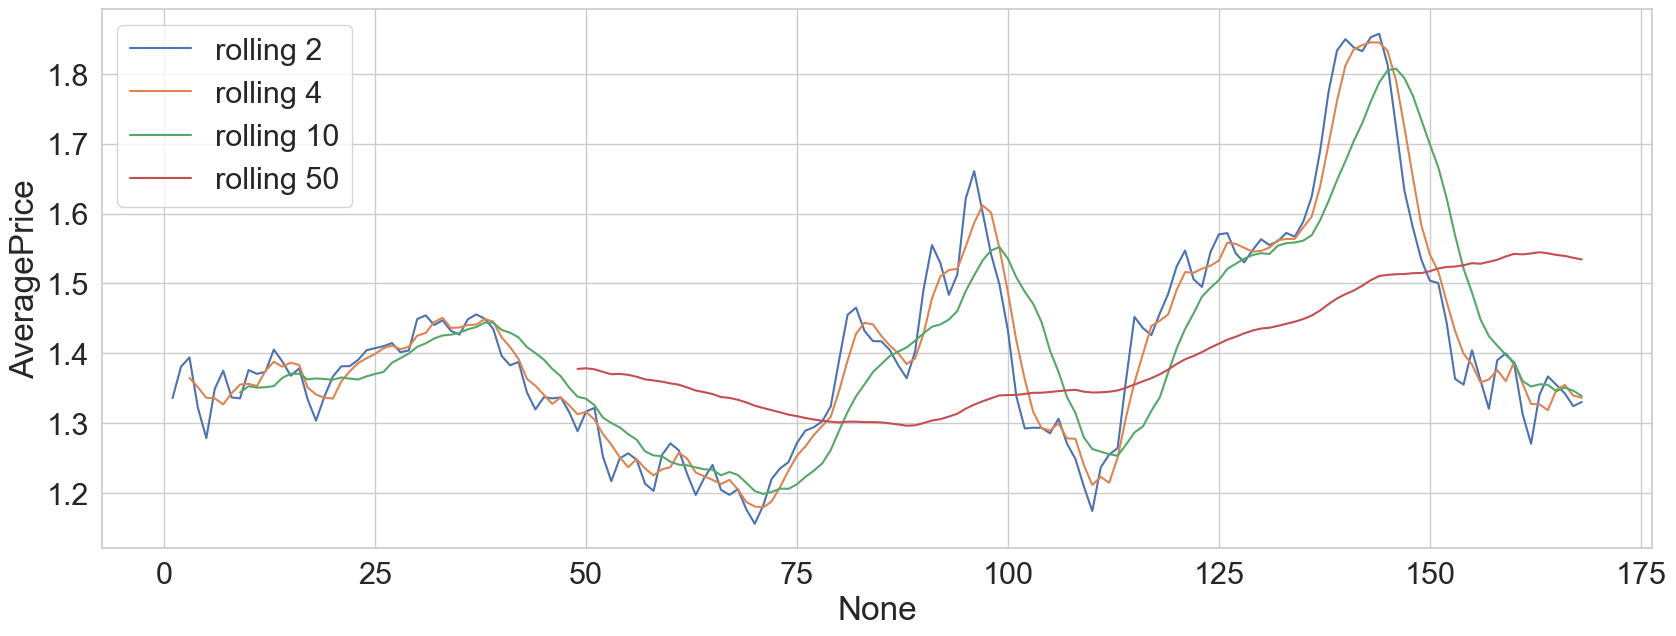

In [22]:
# 2 вариант построения графиков по одному условию через цикл
windows = [2, 4, 10, 50]

for window in windows:
       tdf =  avocado_mean.AveragePrice.rolling(window).mean().to_frame()
       sns.lineplot( x = tdf.index, y = tdf.AveragePrice, label = f'rolling {window}')


### Task_4:

4) ⭐️Задание со звёздочкой!⭐️

​​​​Изучите параметры функций:
- axis
- center
- closed
- min_periods
- on
- win_type
- window
    
в документации https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html и дайте характеристику каждой из вышеперечисленных.

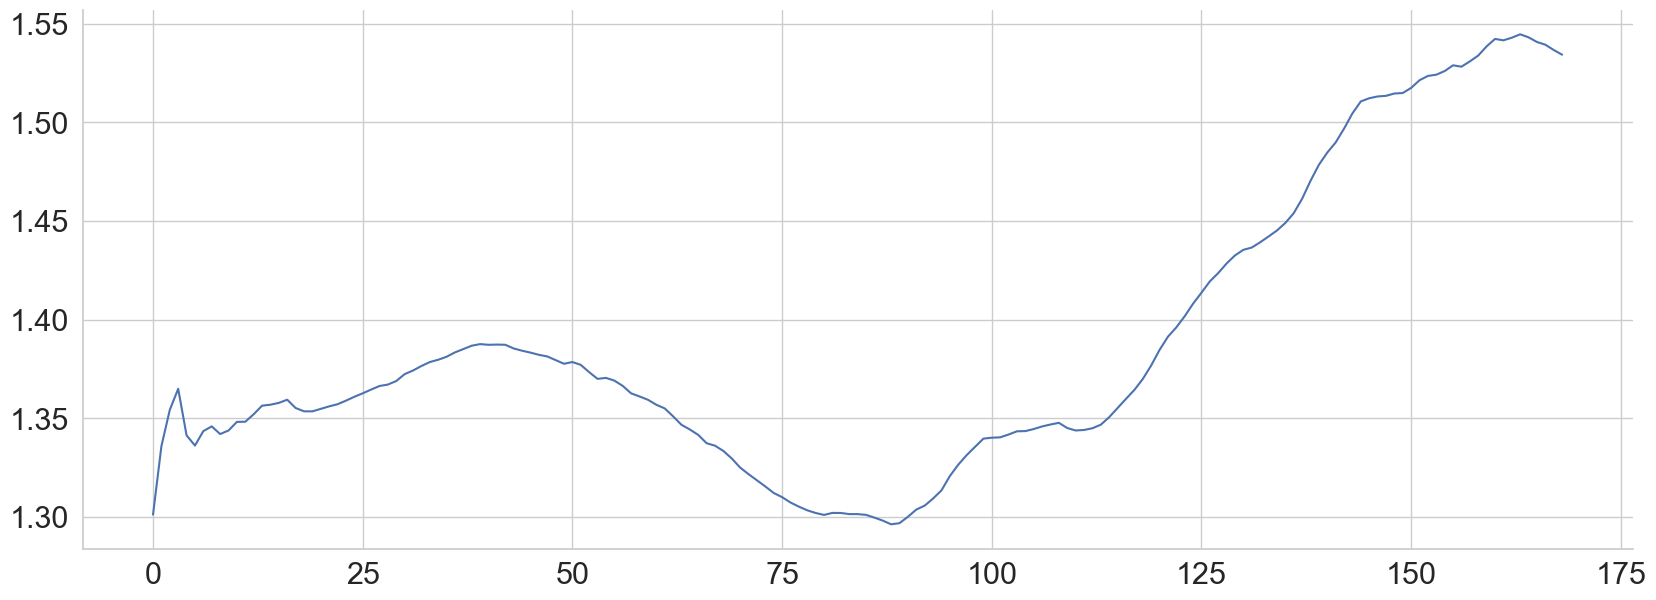

In [23]:
avocado_mean\
        .AveragePrice\
        .rolling(50, min_periods=1 ).mean()\
        .plot()
sns.despine()

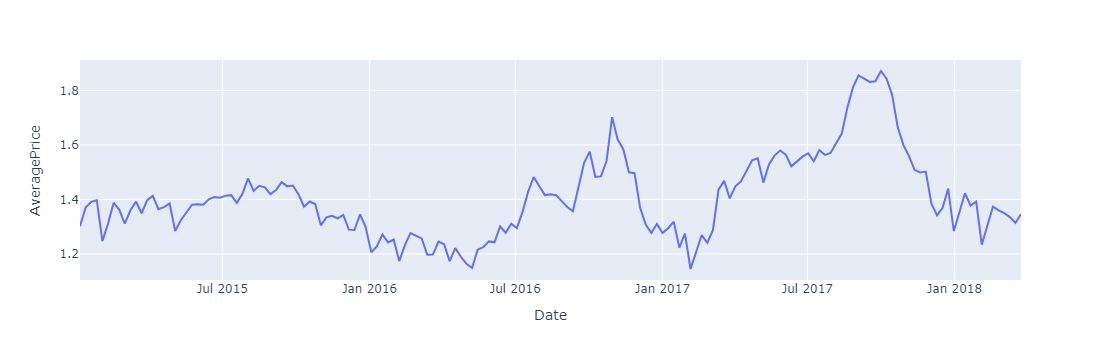

In [100]:
# Интерактивный график из библиотеки Plotly

fig = px.line(avocado_mean, x="Date", y="AveragePrice")
fig.show()

### Task_5:

5) ⭐️Задание со звёздочкой!⭐️

Используйте агрегированные данные avocado_mean.csv о ценах на авокадо и примените функцию ewm() с параметром span=2, чтобы получить экспоненциальное скользящее среднее.

Запишите результат в avocado_ewm.


In [24]:
avocado_mean.head()

Date  AveragePrice
0 2015-01-04      1.301296
1 2015-01-11      1.370648
2 2015-01-18      1.391111
3 2015-01-25      1.397130
4 2015-02-01      1.247037

In [25]:
avocado_ewm = avocado_mean.AveragePrice.ewm(span= 2).mean()
avocado_ewm

0      1.301296
1      1.353310
2      1.379480
3      1.391394
4      1.294758
         ...   
164    1.356212
165    1.352194
166    1.340793
167    1.322734
168    1.338812
Name: AveragePrice, Length: 169, dtype: float64

### Task_6:
6) ⭐️Задание со звёздочкой!⭐️

И еще один стэп, чтобы закрепить материал. Импортируйте полные данные, (avocado_full.csv) указав index_col=0 (использовать первую колонку как индекс).
Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4. Постройте графики, а затем заполните пропуски. Числа округлите до трех знаков после точки.


In [26]:
avocado_full = pd.read_csv(path1, index_col=0)   # index_col=0 - использовать первую колонку в качестве индекса
avocado_full.head()

AveragePrice  Total Volume     4046      4225     4770  \
Date                                                                 
2015-01-04          1.75      27365.89  9307.34   3844.81   615.28   
2015-01-04          1.49      17723.17  1189.35  15628.27     0.00   
2015-01-04          1.68       2896.72   161.68    206.96     0.00   
2015-01-04          1.52      54956.80  3013.04  35456.88  1561.70   
2015-01-04          1.64       1505.12     1.27   1129.50     0.00   

            Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
Date                                                                        
2015-01-04    13598.46    13061.10      537.36          0.0       organic   
2015-01-04      905.55      905.55        0.00          0.0       organic   
2015-01-04     2528.08     2528.08        0.00          0.0       organic   
2015-01-04    14925.18    11264.80     3660.38          0.0  conventional   
2015-01-04      374.35      186.67      187.68          0.0       organic   

            year              region  
Date                                  
2015-01-04  2015           Southeast  
2015-01-04  2015             Chicago  
2015-01-04  2015  HarrisburgScranton  
2015-01-04  2015          Pittsburgh  
2015-01-04  2015               Boise

In [27]:
# скользящее среднее с окном 4
avo_organic_from_сhicago_rolling_4 = avocado_full\
                                            .query('type ==  "organic" and region == "Chicago" ')\
                                            .AveragePrice\
                                            .rolling(4).mean()\
                                            .round(3)
avo_organic_from_сhicago_rolling_4

Date
2015-01-04      NaN
2015-01-11      NaN
2015-01-18      NaN
2015-01-25    1.730
2015-02-01    1.738
              ...  
2018-02-25    1.652
2018-03-04    1.652
2018-03-11    1.655
2018-03-18    1.655
2018-03-25    1.658
Name: AveragePrice, Length: 169, dtype: float64

In [28]:
# экспоненциальное скользящее среднее с параметром span=4
avo_organic_from_сhicago_ewn_4 = avocado_full\
                                        .query('type ==  "organic" and region == "Chicago" ')\
                                        .AveragePrice\
                                        .ewm(span= 2).mean()\
                                        .round(3)
avo_organic_from_сhicago_ewn_4

Date
2015-01-04    1.490
2015-01-11    1.715
2015-01-18    1.781
2015-01-25    1.814
2015-02-01    1.617
              ...  
2018-02-25    1.673
2018-03-04    1.638
2018-03-11    1.653
2018-03-18    1.658
2018-03-25    1.679
Name: AveragePrice, Length: 169, dtype: float64

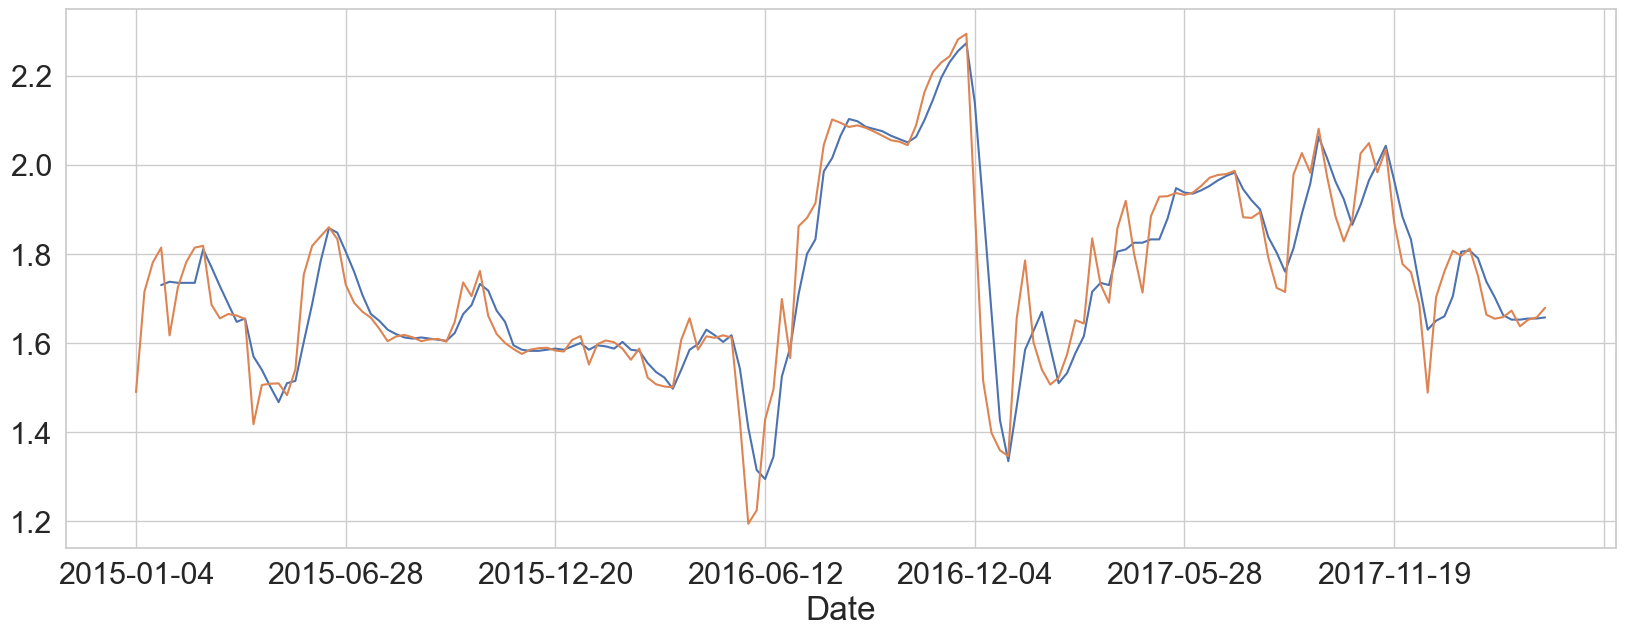

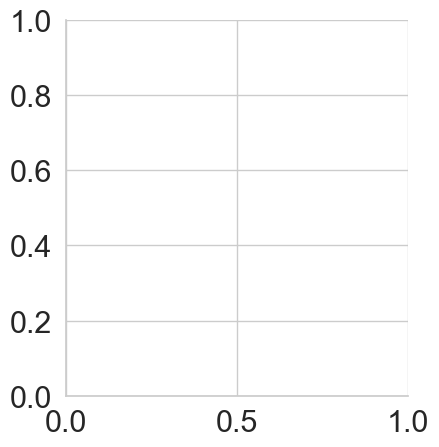

In [150]:
avo_organic_from_сhicago_rolling_4.plot()
avo_organic_from_сhicago_ewn_4.plot()
sns.displot()

In [29]:
# скользящее среднее с окном 4 но без NaN
avo_organic_from_сhicago_rolling_4_min_periods_1 = avocado_full\
                                            .query('type ==  "organic" and region == "Chicago" ')\
                                            .AveragePrice\
                                            .rolling(4, min_periods=1).mean()\
                                            .round(3)
avo_organic_from_сhicago_rolling_4_min_periods_1

Date
2015-01-04    1.490
2015-01-11    1.640
2015-01-18    1.697
2015-01-25    1.730
2015-02-01    1.738
              ...  
2018-02-25    1.652
2018-03-04    1.652
2018-03-11    1.655
2018-03-18    1.655
2018-03-25    1.658
Name: AveragePrice, Length: 169, dtype: float64

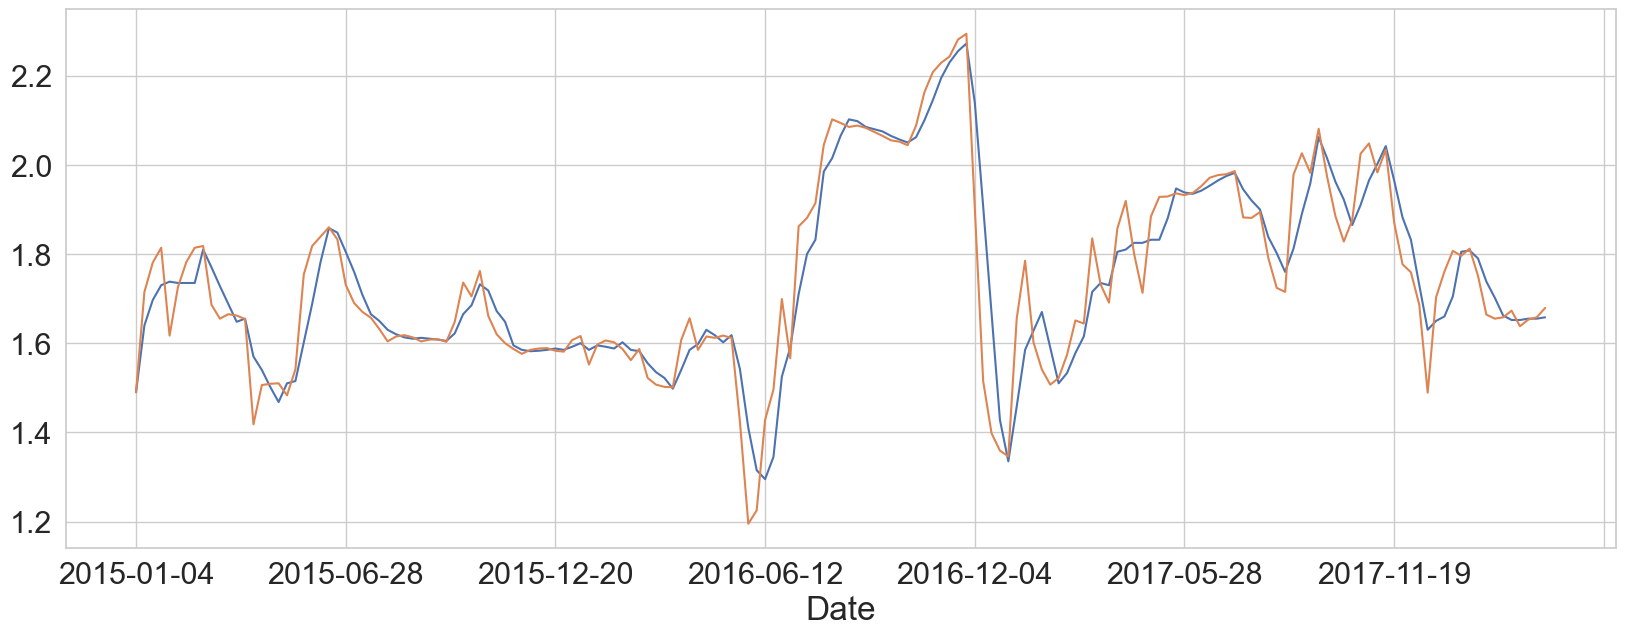

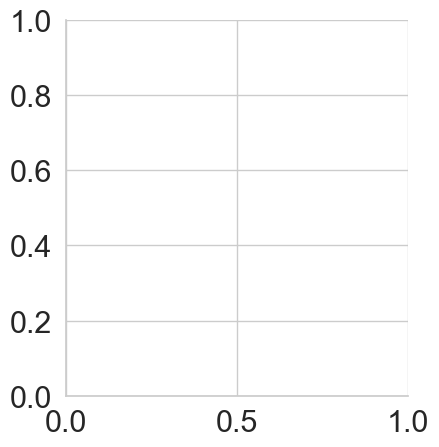

In [30]:
avo_organic_from_сhicago_rolling_4_min_periods_1.plot()
avo_organic_from_сhicago_ewn_4.plot()
sns.displot()

<Axes: xlabel='Date'>

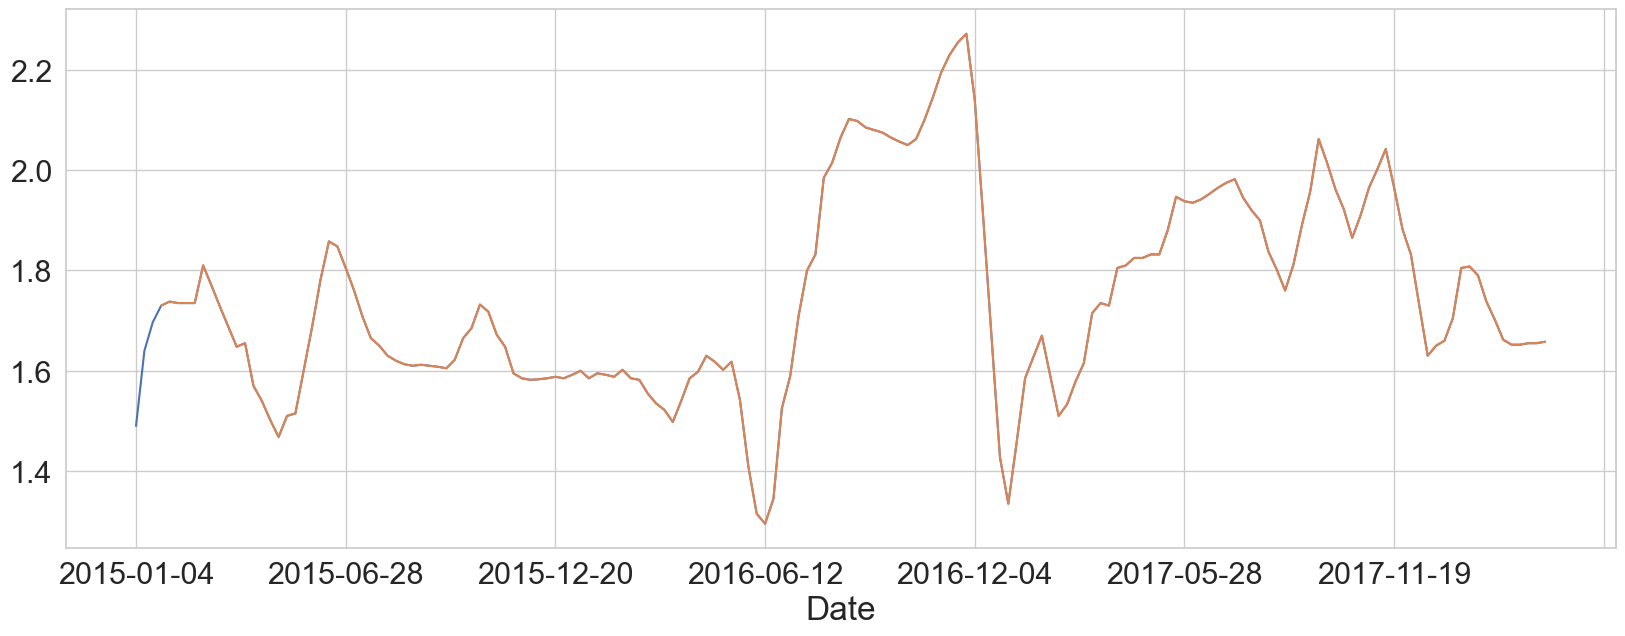

In [31]:
avo_organic_from_сhicago_rolling_4_min_periods_1.plot()
avo_organic_from_сhicago_rolling_4.plot()

### Task_7:
7) 💀 Сложное задание! 💀

Далее будем работать с данными по опозданиям в заключении сделок!

В файле delays находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали.

Сначала давайте переведём delay в timedelta формат. 

Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -. Сохраните данные в переменную df, отформатируйте колонку нужным 
способом (подсказка – уберите -) и переведите её в тип timedelta.


Могут понадобиться

    pd.to_timedelta()
    
    pd.Series.str


In [32]:
path3 = 'C://Users/user/Karpov_courses/Lessons/Lesson_6/delays.csv'
delays = pd.read_csv(path3)   
delays.head()

client_id  company_id                        delay  revenue
0       2389        4240  -1 days -14:57:48.000000000   705436
1       7614        9544  -4 days -02:14:23.000000000   859266
2       2052        2427  -0 days -06:08:57.000000000   812416
3       9635        8054  -0 days -23:40:19.000000000   162312
4       8154        5503  -1 days -13:21:53.000000000   658844

In [33]:
# delays['delay'] = pd.to_timedelta(delays.delay)
# delays.head()

In [35]:
'-4 days -02:14:23.000000000'.replace('-', '')

'4 days 02:14:23.000000000'

In [42]:
delays['delay'] = pd.to_timedelta(delays.delay.str.replace('-', ''))

In [43]:
delays

client_id  company_id           delay  revenue
0         2389        4240 1 days 14:57:48   705436
1         7614        9544 4 days 02:14:23   859266
2         2052        2427 0 days 06:08:57   812416
3         9635        8054 0 days 23:40:19   162312
4         8154        5503 1 days 13:21:53   658844
..         ...         ...             ...      ...
259       5837        2617 0 days 05:32:08   602129
260       2384        2364 3 days 23:27:14   910660
261       5146        3331 1 days 15:22:34   401137
262       7203        5532 2 days 17:15:02   308979
263       3822        9882 1 days 15:50:29   877773

[264 rows x 4 columns]

In [44]:
delays['delay']

0     1 days 14:57:48
1     4 days 02:14:23
2     0 days 06:08:57
3     0 days 23:40:19
4     1 days 13:21:53
            ...      
259   0 days 05:32:08
260   3 days 23:27:14
261   1 days 15:22:34
262   2 days 17:15:02
263   1 days 15:50:29
Name: delay, Length: 264, dtype: timedelta64[ns]

### Task_8:

8) Время это хорошо, но хотелось бы также разбить его на промежутки. Разбейте время на 3 интервала и поместите соответствующие значения в колонку delay_categorical

Могут понадобится:
pd.cut()

In [49]:
#Пр:   0 1 2   |  3 4 5 6   |    7 8 9 
#      small       medium        large


delays['delay_categorical'] = pd.cut(delays.delay,
                                           bins   = 3,
                                           labels = ['low', 'medium', 'high']  
                                    )          
# bins = 3    -  разбиение диапазона на 3 равномерные карзины (интервала)
delays       

client_id  company_id           delay  revenue delay_categorical
0         2389        4240 1 days 14:57:48   705436               low
1         7614        9544 4 days 02:14:23   859266              high
2         2052        2427 0 days 06:08:57   812416               low
3         9635        8054 0 days 23:40:19   162312               low
4         8154        5503 1 days 13:21:53   658844               low
..         ...         ...             ...      ...               ...
259       5837        2617 0 days 05:32:08   602129               low
260       2384        2364 3 days 23:27:14   910660              high
261       5146        3331 1 days 15:22:34   401137               low
262       7203        5532 2 days 17:15:02   308979            medium
263       3822        9882 1 days 15:50:29   877773               low

[264 rows x 5 columns]

### Task_9:
9) 💀 Сложное задание! 💀

Разбилось конечно неплохо, но хочется чуть более целые значения и более человеческие названия. В этом нам помогут аргументы функции pd.cut! Перезадайте колонку delay_categorical, чтобы значения в ней были

    'less than 1 day' – время от 0 до 1 дня
    '1-2 days' – от 1 до 2 дней
    '2-3 days' – от 2 до 3 дней
    'more than 3 days' – больше 3 дней

In [52]:
pd.to_timedelta('1d')

Timedelta('1 days 00:00:00')

In [58]:
bins = [pd.to_timedelta('0'),
        pd.to_timedelta('1d'),
        pd.to_timedelta('2d'),
        pd.to_timedelta('3d'),
        pd.to_timedelta('1000d')]

# создание интервалов - (0:1], (1:2], (2:3], (3:1000]

In [55]:
labels = ['less than 1 day', 
          '1-2 days', 
          '2-3 days',
          'more than 3 days']  

In [57]:
delays['delay_categorical'] = pd.cut(delays.delay,
                                           bins   = bins,
                                           labels = labels
                                    )          
delays       

client_id  company_id           delay  revenue delay_categorical
0         2389        4240 1 days 14:57:48   705436          1-2 days
1         7614        9544 4 days 02:14:23   859266  more than 3 days
2         2052        2427 0 days 06:08:57   812416   less than 1 day
3         9635        8054 0 days 23:40:19   162312   less than 1 day
4         8154        5503 1 days 13:21:53   658844          1-2 days
..         ...         ...             ...      ...               ...
259       5837        2617 0 days 05:32:08   602129   less than 1 day
260       2384        2364 3 days 23:27:14   910660  more than 3 days
261       5146        3331 1 days 15:22:34   401137          1-2 days
262       7203        5532 2 days 17:15:02   308979          2-3 days
263       3822        9882 1 days 15:50:29   877773          1-2 days

[264 rows x 5 columns]

### Task_10:
10) Прекрасно! Теперь постройте интерактивный барплот с тем, насколько часто задерживаются сделки, выясните самый редкий и самый частый варианты.

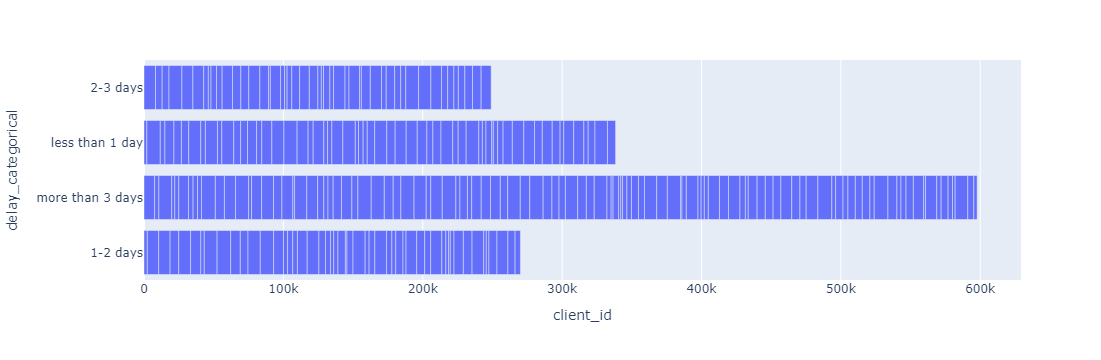

In [80]:
# Интерактивный график из библиотеки Plotly

fig = px.bar(delays, x= 'client_id', y = 'delay_categorical')
fig.show()

In [74]:
delays.delay_categorical.value_counts()

delay_categorical
more than 3 days    107
less than 1 day      59
1-2 days             51
2-3 days             47
Name: count, dtype: int64